In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy import feature as cfeature

### Loading metar sets

In [2]:
Met_20170701 = Dataset(  # Metar Training Data
    '/Users/jesseturner/Documents/Wind_Gust_Prediction/Gust_data/20170701_0000')
Met_20180613 = Dataset(  # Metar Training Data
    '/Users/jesseturner/Documents/Wind_Gust_Prediction/Gust_data/20180613_0000')
Met_20190801 = Dataset( # Metar Testing Data
    '/Users/jesseturner/Documents/Wind_Gust_Prediction/Gust_data/2019_08_01/20190801_0300')

### Compile and crop metar data to the continental US

There is likely a more efficient way to do this. The warning of "converting a masked element to nan" is currently expected, but may be changed to do manually in the future. 

In [3]:
met_stationName_1 = Met_20170701.variables['stationName']
met_locationName_1 = Met_20170701.variables['locationName']
met_qct_1 = Met_20170701.variables['QCT']
met_lon_1 = Met_20170701.variables['longitude']
met_lat_1 = Met_20170701.variables['latitude']
met_elevation_1 = Met_20170701.variables['elevation']
met_timeObs_1 = Met_20170701.variables['timeObs']
met_skyCover_1 = Met_20170701.variables['skyCover']
met_seaLevelPress_1 = Met_20170701.variables['seaLevelPress']
met_altimeter_1 = Met_20170701.variables['altimeter']
met_pressChange3Hour_1 = Met_20170701.variables['pressChange3Hour']

met_gust_1 = Met_20170701.variables['windGust']
met_temp_1 = Met_20170701.variables['temperature']
met_windspeed_1 = Met_20170701.variables['windSpeed']
met_winddir_1 = Met_20170701.variables['windDir']
met_press_1 = Met_20170701.variables['seaLevelPress']

met_gust_2 = Met_20180613.variables['windGust']
met_lon_2 = Met_20180613.variables['longitude']
met_lat_2 = Met_20180613.variables['latitude']
met_temp_2 = Met_20180613.variables['temperature']
met_windspeed_2 = Met_20180613.variables['windSpeed']
met_winddir_2 = Met_20180613.variables['windDir']
met_press_2 = Met_20180613.variables['seaLevelPress']

#--------Test Data--------
met_gust_test = Met_20190801.variables['windGust']
met_lon_test = Met_20190801.variables['longitude']
met_lat_test = Met_20190801.variables['latitude']
met_temp_test = Met_20190801.variables['temperature']
met_windspeed_test = Met_20190801.variables['windSpeed']
met_winddir_test = Met_20190801.variables['windDir']
met_press_test = Met_20190801.variables['seaLevelPress']

top = 49.3457868  # north lat
left = -124.7844079  # west lon
right = -66.9513812  # east lon
bottom = 24.7433195  # south lat

cell = []
for g, lon, lat, t, ws, wd, p in zip(met_gust_1, met_lon_1, met_lat_1, 
                                     met_temp_1, met_windspeed_1, met_winddir_1, met_press_1):
    if left <= lon <= right and bottom <= lat <= top:
        cell.append((g, lon, lat, t, ws, wd, p))

for g, lon, lat, t, ws, wd, p in zip(met_gust_2, met_lon_2, met_lat_2, 
                                     met_temp_2, met_windspeed_2, met_winddir_2, met_press_2):
    if left <= lon <= right and bottom <= lat <= top:
        cell.append((g, lon, lat, t, ws, wd, p))

met_pos = np.asarray(cell)

#--------Test Data--------
cell_test = []
for g, lon, lat, t, ws, wd, p in zip(met_gust_test, met_lon_test, met_lat_test, 
                                     met_temp_test, met_windspeed_test, met_winddir_test, met_press_test):
    if left <= lon <= right and bottom <= lat <= top:
        cell_test.append((g, lon, lat, t, ws, wd, p))

met_pos_test = np.asarray(cell_test)

/Applications/anaconda3/envs/wind_gust/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


### Convert metar data to dataframe

In [4]:
met_df = pd.DataFrame(
    {'MetWindGust': met_pos[:, 0],
     'Longitude': met_pos[:, 1],
     'Latitude': met_pos[:, 2],
     'Temperature': met_pos[:, 3],
     'WindSpeed': met_pos[:, 4],
     'WindDirection': met_pos[:, 5],
     'Pressure': met_pos[:, 6]})

met_df = met_df.round(4)
met_df = met_df.replace(np.NaN, 0)
pd.set_option('display.min_rows', 100)
met_df

#--------Test Data--------
met_df_test = pd.DataFrame(
    {'MetWindGust': met_pos_test[:, 0],
     'Longitude': met_pos_test[:, 1],
     'Latitude': met_pos_test[:, 2],
     'Temperature': met_pos_test[:, 3],
     'WindSpeed': met_pos_test[:, 4],
     'WindDirection': met_pos_test[:, 5],
     'Pressure': met_pos_test[:, 6]})

met_df_test = met_df_test.round(4)
met_df_test = met_df_test.replace(np.NaN, 0)

### Plot metar locations

Uses the converted zeroes from the dataframe. 

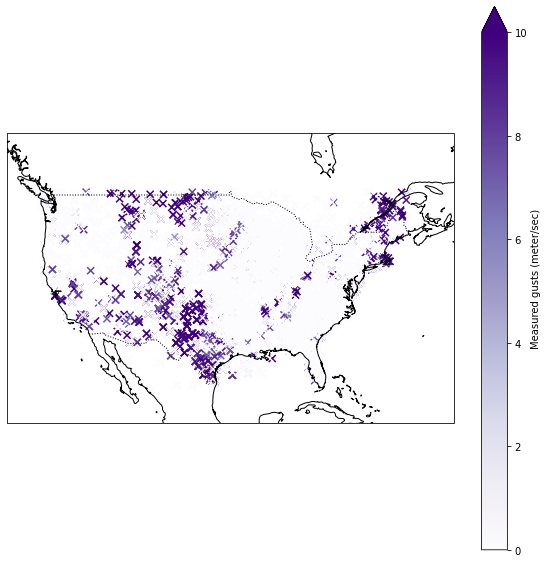

In [8]:
fig = plt.figure(figsize=(10, 10), facecolor='w')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.scatter(met_df.Longitude, met_df.Latitude, c=met_df.MetWindGust, cmap='Purples', vmin=0, vmax=10,
            s=50, marker='x', transform=ccrs.PlateCarree())

plt.colorbar(label='Measured gusts (meter/sec)', extend='max')

plt.show()

### Looking at metar data

Highest readings and their locations.

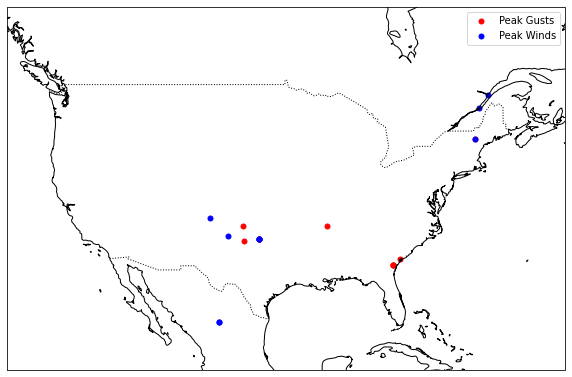

In [13]:
gust_metar = met_df.sort_values(by=['MetWindGust'], ascending=False)
highest_gust = gust_metar[0:10]

wind_metar = met_df.sort_values(by=['WindSpeed'], ascending=False)
highest_wind = wind_metar[0:10]

fig = plt.figure(figsize=(10, 10), facecolor='w')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.scatter(highest_gust.Longitude, highest_gust.Latitude, c='Red',
             vmin=0, vmax=50, s=25, label='Peak Gusts', transform=ccrs.PlateCarree())
plt.scatter(highest_wind.Longitude, highest_wind.Latitude, c='Blue',
             vmin=0, vmax=50, s=25, label='Peak Winds', transform=ccrs.PlateCarree())

plt.legend()
plt.show()